<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_5_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 5.1.2 Identifying anomalies using z-score or Gaussian method

An online bookstore wants to determine the popularity of books sold during the previous financial year. The data collected consists of 5,000 titles, the number of books sold, and an unique ID code.

Follow the demonstration to see how to perform anomaly detection with the $z$-score method based on the online bookstore data set. You’ll learn about the benefits of analysing unlabelled data and identifying and interpreting anomalies.


In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the data with a URL link from GitHub.
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/books.csv')

# Display the first few rows of the data set.
print(data.shape)
data.head()

(5000, 2)


,ID,Books
0,1095_21,97
1,1095_22,100
2,1095_23,100
3,1095_24,100
4,1095_25,102


In [ ]:
# Determine metadata of DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5000 non-null   object
 1   Books   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
# Remove the ID column.
clean = data.drop('ID', axis=1)

# View DataFrame.
clean

,Books
0,97
1,100
2,100
3,100
4,102
...,...
4995,101
4996,100
4997,97
4998,102


In [ ]:
# Descriptive stats:
clean.describe().round(0)

,Books
count,5000.0
mean,100.0
std,2.0
min,95.0
25%,99.0
50%,100.0
75%,101.0
max,106.0


<Axes: ylabel='Count'>

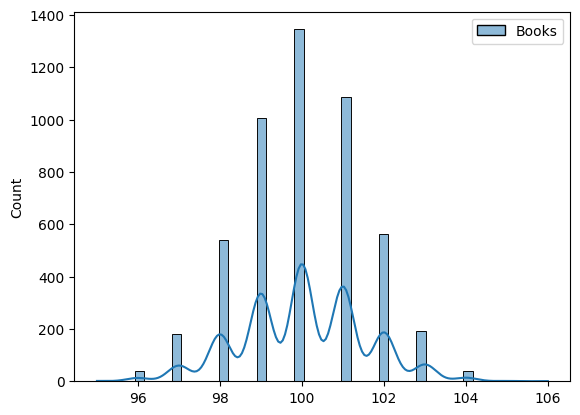

In [ ]:
# Visualise data with histogram.
sns.histplot(data = data, kde = True)

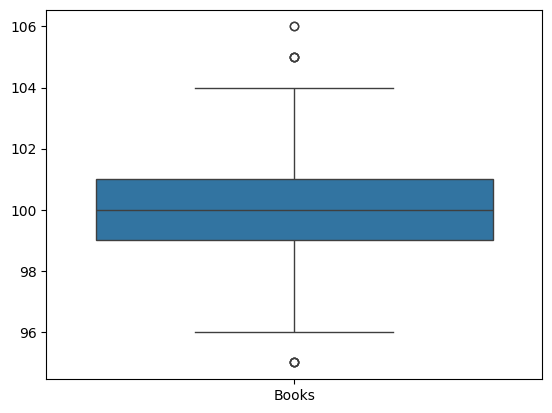

In [ ]:
# Visualise the data with boxplot.
sns.boxplot(data=clean)
plt.show()

In [ ]:
# Import necessary library.
from scipy.stats import zscore

# Apply z-score normalisation and calculate z-scores.
z_scores = clean.apply(zscore)

# View output.
z_scores

,Books
0,-2.014245
1,-0.025326
2,-0.025326
3,-0.025326
4,1.300620
...,...
4995,0.637647
4996,-0.025326
4997,-2.014245
4998,1.300620


In [ ]:
# Define a threshold. We'll start with three standard deviations.
threshold = 3

# Identify anomalies
anomalies = z_scores[(z_scores > threshold) | (z_scores < -threshold)].dropna(how='all')

# View output.
print(anomalies.shape)
anomalies

(10, 1)


,Books
50,3.952513
533,3.289540
1001,3.289540
1284,3.289540
2059,3.952513
2292,3.289540
2354,-3.340191
2439,-3.340191
3627,-3.340191
3764,-3.340191


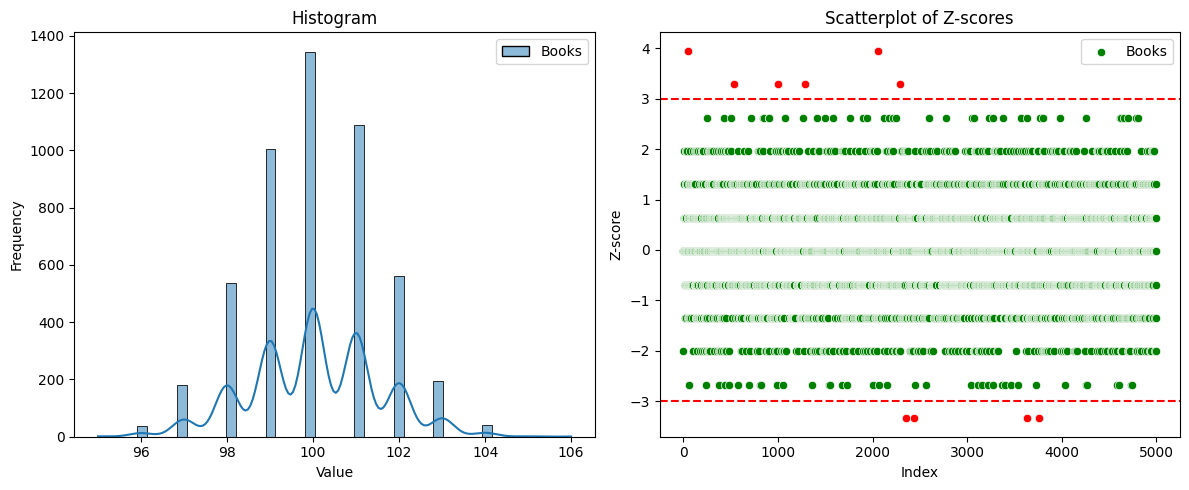

In [ ]:
# Plotting:
plt.figure(figsize=(12, 5))

# Histogram of the raw data.
plt.subplot(1, 2, 1)
sns.histplot(clean, kde=True,
             color='blue')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Scatter plot of the z-scores.
plt.subplot(1, 2, 2)
# Normal data points.
sns.scatterplot(x=z_scores.index, y=z_scores['Books'],
                color='g', label='Books')

# Outliers.
anomalies = z_scores[(z_scores['Books'] > threshold) | (z_scores['Books'] < -threshold)]
sns.scatterplot(x=anomalies.index, y=anomalies['Books'], color='r')

plt.axhline(3, color='r', linestyle='--')  # Red line at z-score of 3.
plt.axhline(-3, color='r', linestyle='--') # Red line at z-score of -3.
plt.title('Scatterplot of z-scores')
plt.xlabel('Index')
plt.ylabel('Z-score')

plt.tight_layout()
plt.show()

In [ ]:
# Define a threshold of two standard deviations.
threshold = 2

# Identify anomalies.
anomalies_2 = z_scores[(z_scores > threshold) | (z_scores < -threshold)].dropna(how='all')

# View output.
print(anomalies_2.shape)
anomalies_2

(269, 1)


,Books
0,-2.014245
50,3.952513
63,-2.677218
101,-2.014245
148,-2.014245
...,...
4928,-2.014245
4940,-2.014245
4946,-2.014245
4990,-2.014245


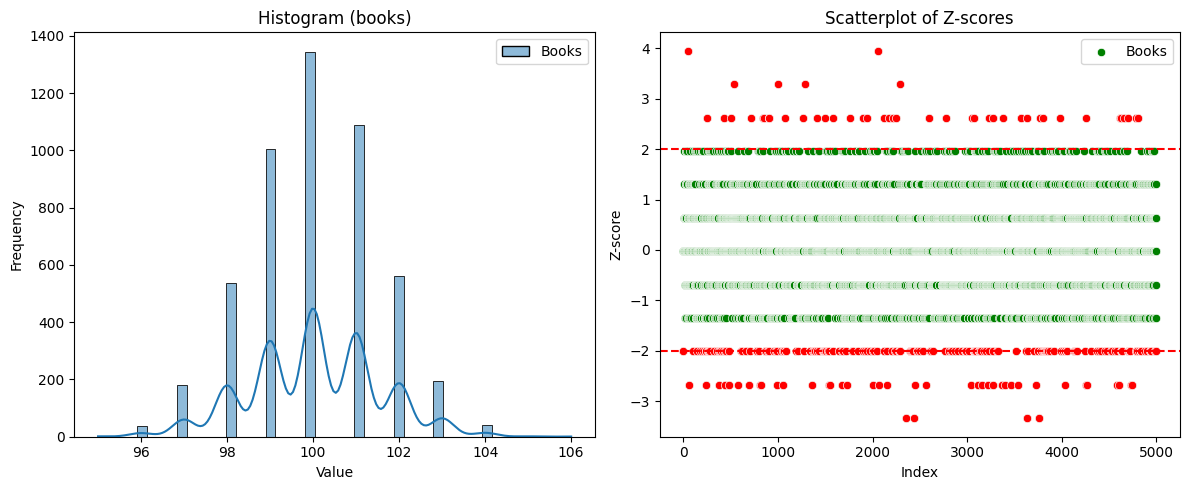

In [ ]:
# Plotting:
plt.figure(figsize=(12, 5))

# Histogram of the raw data.
plt.subplot(1, 2, 1)
sns.histplot(clean, kde=True,
             color='blue')
plt.title('Histogram (books)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Scatter plot of the z-scores.
plt.subplot(1, 2, 2)
# Normal data points.
sns.scatterplot(x=z_scores.index, y=z_scores['Books'],
                color='g', label='Books')

# Outliers:
anomalies = z_scores[(z_scores['Books'] > threshold) | (z_scores['Books'] < -threshold)]
sns.scatterplot(x=anomalies.index, y=anomalies['Books'], color='r')

plt.axhline(2, color='r', linestyle='--')  # Red line at Z-score of 2.
plt.axhline(-2, color='r', linestyle='--') # Red line at Z-score of -2.
plt.title('Scatterplot of z-scores')
plt.xlabel('Index')
plt.ylabel('Z-score')

plt.tight_layout()
plt.show()

# Key information
This demonstration illustrated the importance of identifying and filtering anomalies with the $z$-score method. It is important to understand the business scenario before you drop or replace anomalies.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.